**M6 - PARTE 3**

In [ ]:
# importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_style('white') # Alterado de 'whitegrid' para 'white'
plt.rcParams['figure.dpi'] = 120

**1- A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.**

In [ ]:
#Carregar a base e (opcional) o PDF dicionário
caminho_csv = '/content/ M6 - SINASC_RO_2019.csv'
sinasc = pd.read_csv(caminho_csv, low_memory=False)

print("Dataset carregado:", caminho_csv)
print("Linhas, colunas:", sinasc.shape)
display(sinasc.head())

Dataset carregado: /content/ M6 - SINASC_RO_2019.csv
Linhas, colunas: (27028, 69)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


**2 - Categorize a variável APGAR5 conforme as seguintes quebras:**

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [ ]:
# Categorizar APGAR5 em faixas definidas
# - 0 a 3: 'asfixia grave'
# - 4 a 5: 'asfixia moderada'
# - 6 a 7: 'asfixia leve'
# - 8 a 10: 'normal'
# Vamos criar uma coluna 'APGAR5_cat'

In [ ]:
# Categorizar APGAR5
def categorizar_apgar5(apgar5):
    if 0 <= apgar5 <= 3:
        return 'asfixia grave'
    elif 4 <= apgar5 <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar5 <= 7:
        return 'asfixia leve'
    elif 8 <= apgar5 <= 10:
        return 'normal'
    else:
        return np.nan # Tratar valores fora do intervalo como NaN

sinasc['APGAR5_cat'] = sinasc['APGAR5'].apply(categorizar_apgar5)

# Exibir a contagem de valores para a nova coluna
print("\nContagem de valores para a categoria APGAR5:")
display(sinasc['APGAR5_cat'].value_counts())


Contagem de valores para a categoria APGAR5:


,count
APGAR5_cat,
normal,26463
asfixia leve,320
asfixia grave,74
asfixia moderada,68


In [ ]:
# Exibir informações sobre as colunas do DataFrame
print("Informações sobre as colunas:")
sinasc.info()

print("\nDescrição estatística das colunas numéricas:")
display(sinasc.describe())

Informações sobre as colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
count,27028.0,2.691300e+04,27028.000000,27028.000000,27028.000000,26711.000000,24121.000000,25455.000000,24930.000000,27028.000000,...,27028.000000,27028.0,27028.000000,27028.000000,27028.000000,2.702800e+04,27027.000000,27027.000000,27027.000000,27027.000000
mean,1.0,3.267629e+06,111037.796211,1.011396,26.093718,2.545318,795604.031591,1.053899,0.266506,110029.055720,...,0.999778,1.0,4.328437,0.648772,4.974952,7.367650e+05,-10.377988,-62.754987,179.111999,14702.799767
std,0.0,1.122677e+06,18102.751466,0.161679,6.387094,1.671248,283884.959287,1.170874,0.613909,36.036466,...,0.014898,0.0,2.930690,0.477363,2.067085,7.430325e+05,1.372942,1.269490,123.138365,13706.177751
min,1.0,1.531800e+04,110001.000000,1.000000,11.000000,1.000000,10205.000000,0.000000,0.000000,110000.000000,...,0.000000,1.0,1.000000,0.000000,1.000000,1.000000e+00,-13.499760,-65.329150,85.000000,459.978000
25%,1.0,2.496534e+06,110011.000000,1.000000,21.000000,1.000000,521125.000000,0.000000,0.000000,110012.000000,...,1.000000,1.0,2.000000,0.000000,4.000000,6.802750e+03,-11.433870,-63.831450,87.000000,3792.998000
50%,1.0,2.798484e+06,110020.000000,1.000000,26.000000,2.000000,999992.000000,1.000000,0.000000,110020.000000,...,1.000000,1.0,4.000000,1.000000,5.000000,1.364550e+04,-10.435950,-63.033270,153.000000,6896.648000
75%,1.0,3.970442e+06,110020.000000,1.000000,31.000000,5.000000,999992.000000,2.000000,0.000000,110028.000000,...,1.000000,1.0,5.000000,1.000000,5.000000,1.486846e+06,-8.768890,-61.945090,191.000000,34096.394000
max,1.0,9.659366e+06,520870.000000,4.000000,53.000000,9.000000,999994.000000,30.000000,28.000000,110180.000000,...,1.000000,1.0,11.000000,1.000000,9.000000,2.780269e+06,-8.768890,-60.138580,595.000000,34096.394000


In [ ]:
# Converter APGAR5 para numérico (se houver valores estranhos, virarão NaN)
sinasc['APGAR5_num'] = pd.to_numeric(sinasc['APGAR5'], errors='coerce')

In [ ]:
# Função de categorização
def apgar5_categoria(x):
    if pd.isna(x):
        return np.nan
    x = int(x)
    if 0 <= x <= 3:
        return 'asfixia grave'
    elif 4 <= x <= 5:
        return 'asfixia moderada'
    elif 6 <= x <= 7:
        return 'asfixia leve'
    elif 8 <= x <= 10:
        return 'normal'
    else:
        return np.nan

sinasc['APGAR5_cat'] = sinasc['APGAR5_num'].apply(apgar5_categoria)

print("\nContagens por categoria de APGAR5:")
display(sinasc['APGAR5_cat'].value_counts(dropna=False))



Contagens por categoria de APGAR5:


,count
APGAR5_cat,
normal,26463
asfixia leve,320
NaN,103
asfixia grave,74
asfixia moderada,68


**3 - Distribuição de APGAR5 por sexo para cada grupo de tempo de gestação**

In [ ]:
print("\nValores únicos de GESTACAO (amostra):")
display(sinasc['GESTACAO'].value_counts().sort_index().head(20))

# Detectar se GESTACAO parece ser numérico em semanas (ex: 28, 36, 39) ou categorias codificadas (1,2,3,4)
# Se for numérico com valores maiores que 10 -> interpretamos como semanas
gestacao_is_numeric = pd.to_numeric(sinasc['GESTACAO'], errors='coerce')
if gestacao_is_numeric.dropna().max() > 10:
    gestacao_type = 'semanas'
else:
    gestacao_type = 'categorica'
print("Interpretação automática de GESTACAO:", gestacao_type)



Valores únicos de GESTACAO (amostra):


,count
GESTACAO,
22 a 27 semanas,86
28 a 31 semanas,165
32 a 36 semanas,2249
37 a 41 semanas,22589
42 semanas e mais,700
Menos de 22 semanas,7


Interpretação automática de GESTACAO: categorica


In [ ]:
# Se for semanas numéricas, criamos faixas (ex: <28, 28-31, 32-36, 37-41, 42+), senão mantemos categorias originais
if gestacao_type == 'semanas':
    # converter para inteiro
    sinasc['GESTACAO_semanas'] = gestacao_is_numeric.astype('Float64')
    # criar faixas: muito prematuro, prematuro moderado, pré-termo (32-36), a termo (37-41), pós-termo (>=42)
    bins = [0, 27, 31, 36, 41, 100]
    labels = ['<28 (muito prematuro)','28-31 (m.p.)','32-36 (pré-termo)','37-41 (a termo)','>=42 (pós-termo)']
    sinasc['GESTACAO_cat'] = pd.cut(sinasc['GESTACAO_semanas'], bins=bins, labels=labels, right=True)
else:
    # GESTACAO é codificada - mostramos as categorias e sugere-se editar o mapping se necessário.
    print("\nGESTACAO possui categorias codificadas. Exibindo valores únicos: ")
    display(sinasc['GESTACAO'].value_counts(dropna=False))
    # Mapeamento baseado nos valores observados na saída de value_counts()
    mapping_gestacao = {
        'Menos de 22 semanas': '<22 semanas',
        '22 a 27 semanas': '22-27 semanas',
        '28 a 31 semanas': '28-31 semanas',
        '32 a 36 semanas': '32-36 semanas',
        '37 a 41 semanas': '37-41 semanas',
        '42 semanas e mais': '>=42 semanas'
    }
    sinasc['GESTACAO_cat'] = sinasc['GESTACAO'].map(mapping_gestacao)


print("\nContagem por GESTACAO_cat (após agrupamento):")
display(sinasc['GESTACAO_cat'].value_counts(dropna=False))


GESTACAO possui categorias codificadas. Exibindo valores únicos: 


,count
GESTACAO,
37 a 41 semanas,22589
32 a 36 semanas,2249
NaN,1232
42 semanas e mais,700
28 a 31 semanas,165
22 a 27 semanas,86
Menos de 22 semanas,7



Contagem por GESTACAO_cat (após agrupamento):


,count
GESTACAO_cat,
37-41 semanas,22589
32-36 semanas,2249
NaN,1232
>=42 semanas,700
28-31 semanas,165
22-27 semanas,86
<22 semanas,7


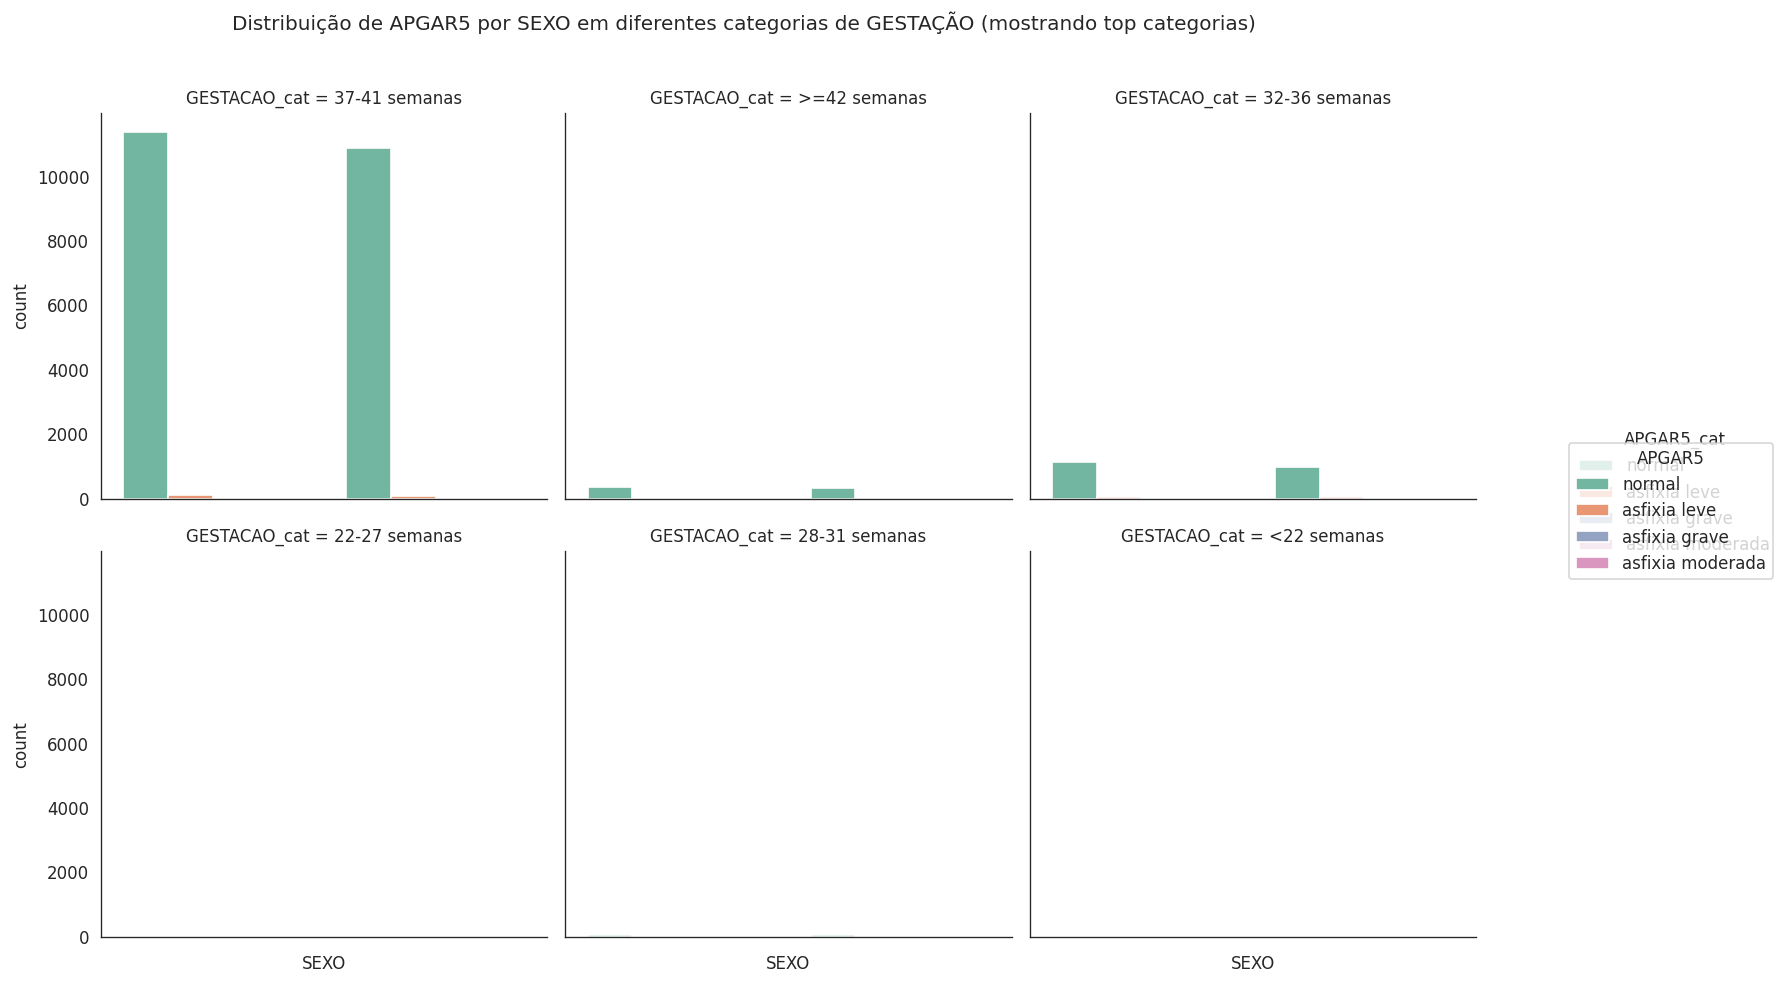

In [91]:
#Gráfico comparando APGAR5 por SEXO para cada GESTACAO_cat
# Vamos usar um gráfico tipo 'catplot' (faceted) mostrando proporções de categorias de APGAR5 por sexo
# Se houver muitas categorias de GESTACAO_cat, vamos limitar as 6 mais frequentes para visualização.
most_common_gest = sinasc['GESTACAO_cat'].value_counts().nlargest(6).index.tolist()
df_plot = sinasc[sinasc['GESTACAO_cat'].isin(most_common_gest)].copy()

# Garantir colunas necessárias
df_plot = df_plot[['APGAR5_cat','SEXO','GESTACAO_cat']].dropna(subset=['APGAR5_cat','SEXO','GESTACAO_cat'])

# Plot: para cada faixa de GESTACAO (col), barras empilhadas ou side-by-side de APGAR5 por SEXO
# Usaremos contagens e deixaremos o catplot lidar com as facetas
g = sns.catplot(
    data=df_plot,
    x='SEXO',
    hue='APGAR5_cat',
    col='GESTACAO_cat',
    kind='count', # Usar kind='count' para barras de contagem
    col_wrap=3,
    height=4,
    aspect=0.9,
    palette='Set2'
)
g.fig.suptitle('Distribuição de APGAR5 por SEXO em diferentes categorias de GESTAÇÃO (mostrando top categorias)', y=1.02)

# Ajustar layouts e rótulos se necessário (por exemplo, girar rótulos do eixo x se houver sobreposição)
g.set_xticklabels(rotation=0) # Ajuste a rotação se necessário

# Mapear as cores usadas pelo seaborn para a legenda manual
# Get handles and labels from one of the axes
handles, labels = g.axes.flat[0].get_legend_handles_labels()

# Remove the default legend from all axes
for ax in g.axes.flat:
    if ax.legend_:
        ax.legend_.remove()

# Add a single legend to the figure
g.fig.legend(handles=handles, labels=labels, title='APGAR5', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)


plt.tight_layout() # Ajuste o layout geral
plt.show()

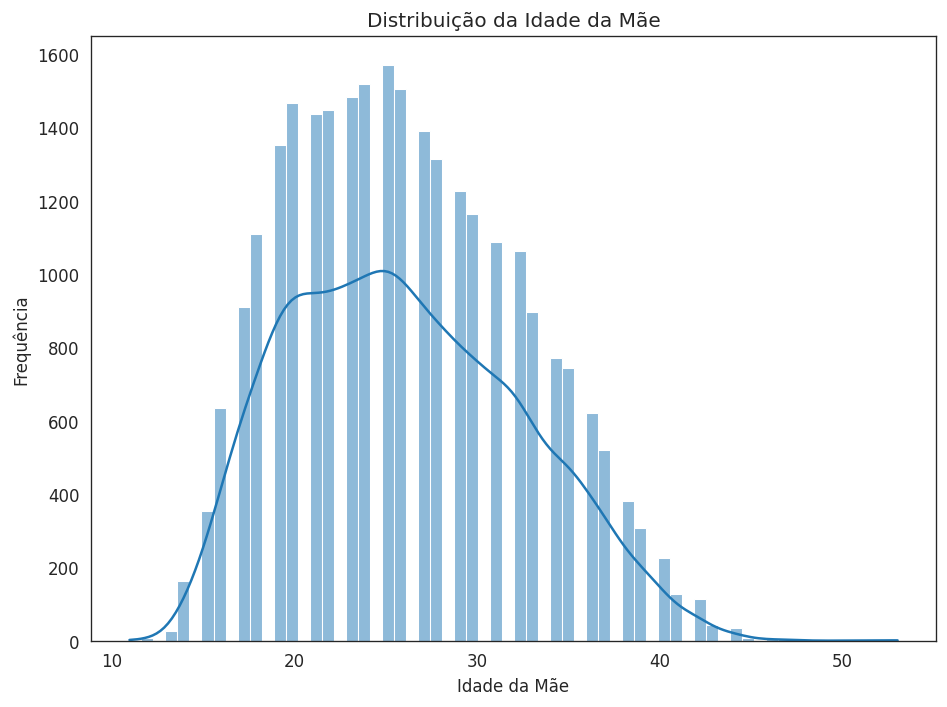

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=sinasc, x='IDADEMAE', kde=True)
plt.xlabel('Idade da Mãe')
plt.ylabel('Frequência')
plt.title('Distribuição da Idade da Mãe')
plt.tight_layout()
plt.show()

In [ ]:
# Calcular o percentual de valores missing de cada coluna
percentual_missing = (sinasc.isnull().sum() / len(sinasc)) * 100

# Exibir o percentual de valores missing
print("Percentual de valores ausentes por coluna:")
display(percentual_missing.sort_values(ascending=False))

Percentual de valores ausentes por coluna:


,0
DTRECORIGA,100.000000
CODANOMAL,99.208229
IDADEPAI,71.855113
SERIESCMAE,47.025307
DTULTMENST,37.265058
...,...
munResStatus,0.000000
CONTADOR,0.000000
KOTELCHUCK,0.000000
PARIDADE,0.000000


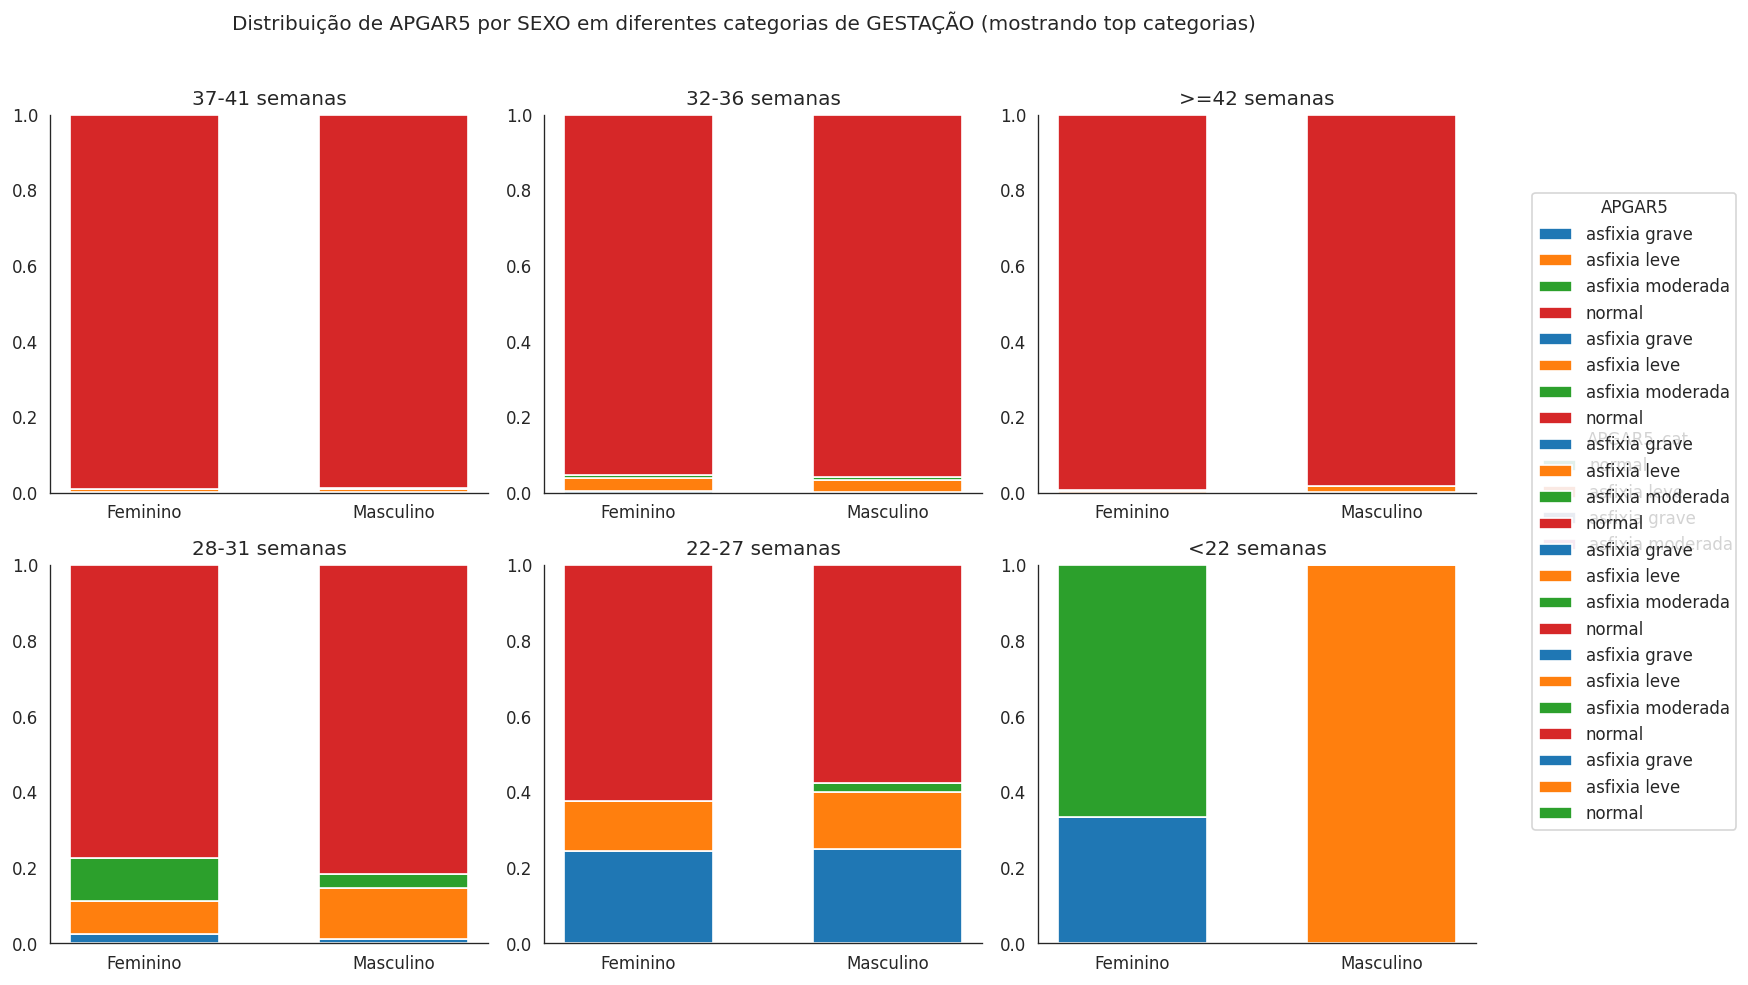

In [ ]:
#Gráfico comparando APGAR5 por SEXO para cada GESTACAO_cat
# Vamos usar um gráfico tipo 'catplot' (faceted) mostrando proporções de categorias de APGAR5 por sexo
# Se houver muitas categorias de GESTACAO_cat, vamos limitar as 6 mais frequentes para visualização.
most_common_gest = sinasc['GESTACAO_cat'].value_counts().nlargest(6).index.tolist()
df_plot = sinasc[sinasc['GESTACAO_cat'].isin(most_common_gest)].copy()

# Garantir colunas necessárias
df_plot = df_plot[['APGAR5_cat','SEXO','GESTACAO_cat']].dropna(subset=['APGAR5_cat','SEXO','GESTACAO_cat'])

# Plot: para cada faixa de GESTACAO (col), barras empilhadas ou side-by-side de APGAR5 por SEXO
# Usaremos proporções: para cada GESTACAO_cat x SEXO, mostrar proporção das classes de APGAR5
g = sns.catplot(
    data=df_plot,
    x='SEXO',
    hue='APGAR5_cat',
    col='GESTACAO_cat',
    kind='count',
    col_wrap=3,
    height=4,
    aspect=0.9,
    palette='Set2'
)
g.fig.suptitle('Distribuição de APGAR5 por SEXO em diferentes categorias de GESTAÇÃO (mostrando top categorias)', y=1.02)
# Converter contagens em proporções em cada subplot
for ax, gest in zip(g.axes.flat, most_common_gest):
    # obter dataframe filtrado
    df_sub = df_plot[df_plot['GESTACAO_cat']==gest]
    # pivot table counts
    pt = pd.crosstab(df_sub['SEXO'], df_sub['APGAR5_cat'])
    pt_norm = pt.div(pt.sum(axis=1), axis=0)
    # para cada sexo, desenhar barras empilhadas de proporções (manual)
    ax.clear()
    sexes = pt_norm.index.tolist()
    cats = pt_norm.columns.tolist()
    bottom = np.zeros(len(sexes))
    x = np.arange(len(sexes))
    width = 0.6
    for cat in cats:
        vals = pt_norm[cat].values
        ax.bar(x, vals, bottom=bottom, width=width, label=cat)
        bottom += vals
    ax.set_xticks(x)
    ax.set_xticklabels(sexes)
    ax.set_title(str(gest))
    ax.set_ylim(0,1)
    if ax == g.axes.flat[-1]:
        # Ajustar a posição da legenda para a direita da figura
        g.fig.legend(title='APGAR5', bbox_to_anchor=(1.02, 0.5), loc='center left')
    elif ax.legend_ is not None: # Check if legend exists before removing
        ax.legend_.remove()
plt.tight_layout()
plt.show()

In [ ]:
# Listar colunas com valores ausentes (percentual > 0)
colunas_com_missing = percentual_missing[percentual_missing > 0]

print("Colunas com valores ausentes:")
# Converter a série para DataFrame para exibição em formato de tabela
df_colunas_missing = colunas_com_missing.reset_index()
df_colunas_missing.columns = ['Coluna', 'Percentual Ausente (%)']
display(df_colunas_missing.sort_values(by='Percentual Ausente (%)', ascending=False))

Colunas com valores ausentes:


,Coluna,Percentual Ausente (%)
16,DTRECORIGA,100.000000
15,CODANOMAL,99.208229
27,IDADEPAI,71.855113
21,SERIESCMAE,47.025307
28,DTULTMENST,37.265058
3,CODOCUPMAE,10.755513
32,MESPRENAT,10.607518
5,QTDFILMORT,7.762321
25,QTDPARTNOR,6.952050
26,QTDPARTCES,6.626461


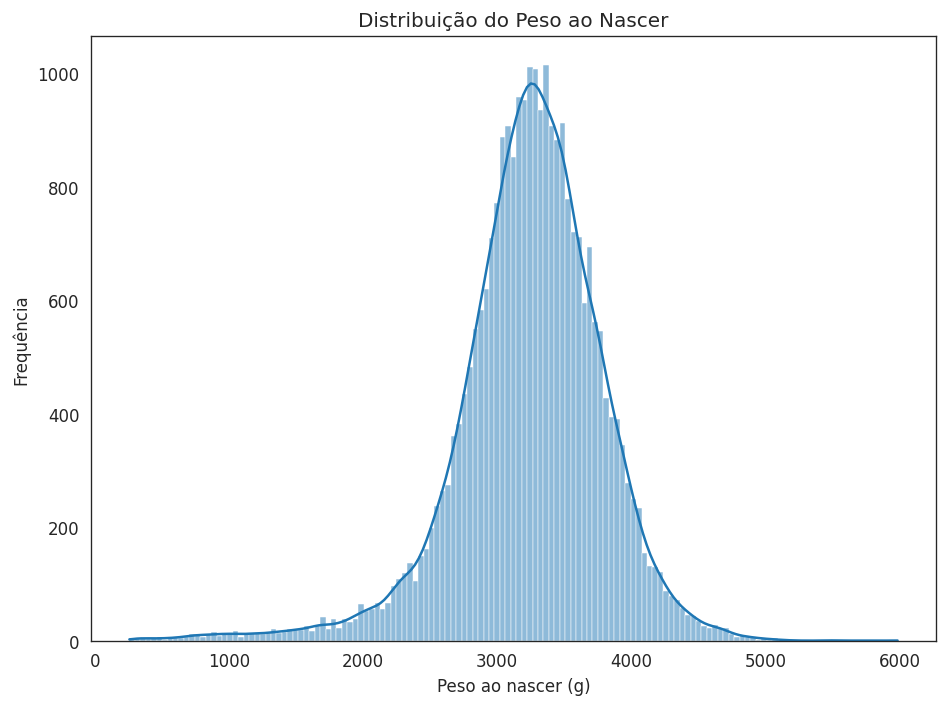

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=sinasc, x='PESO_num', kde=True)
plt.xlabel('Peso ao nascer (g)')
plt.ylabel('Frequência')
plt.title('Distribuição do Peso ao Nascer')
plt.tight_layout()
plt.show()

**4 - Tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas**

In [ ]:
# Usar a coluna 'GESTACAO_cat'
crosstab = pd.crosstab(sinasc['GESTACAO_cat'], sinasc['APGAR5_cat'], dropna=False)
print("\nTabela cruzada (contagens):")
display(crosstab)


Tabela cruzada (contagens):


APGAR5_cat,asfixia grave,asfixia leve,asfixia moderada,normal,NaN
GESTACAO_cat,,,,,
22-27 semanas,21,12,1,51,1
28-31 semanas,3,18,12,129,3
32-36 semanas,8,73,19,2134,15
37-41 semanas,33,196,28,22266,66
<22 semanas,2,1,0,4,0
>=42 semanas,1,6,1,690,2
NaN,6,14,7,1189,16


**5 - Percentuais por linha (distribuição de APGAR5 dentro de cada GESTACAO)**

In [ ]:
crosstab_pct_line = crosstab.div(crosstab.sum(axis=1), axis=0).fillna(0)
print("\nTabela cruzada (percentuais por linha):")
display((crosstab_pct_line * 100).round(2))  # mostrar em % com 2 casas


Tabela cruzada (percentuais por linha):


APGAR5_cat,asfixia grave,asfixia leve,asfixia moderada,normal,NaN
GESTACAO_cat,,,,,
22-27 semanas,24.42,13.95,1.16,59.30,1.16
28-31 semanas,1.82,10.91,7.27,78.18,1.82
32-36 semanas,0.36,3.25,0.84,94.89,0.67
37-41 semanas,0.15,0.87,0.12,98.57,0.29
<22 semanas,28.57,14.29,0.00,57.14,0.00
>=42 semanas,0.14,0.86,0.14,98.57,0.29
NaN,0.49,1.14,0.57,96.51,1.30


**6 - Gráfico de barras da tabela cruzada e conclusão sobre prematuridade (<37 semanas)**

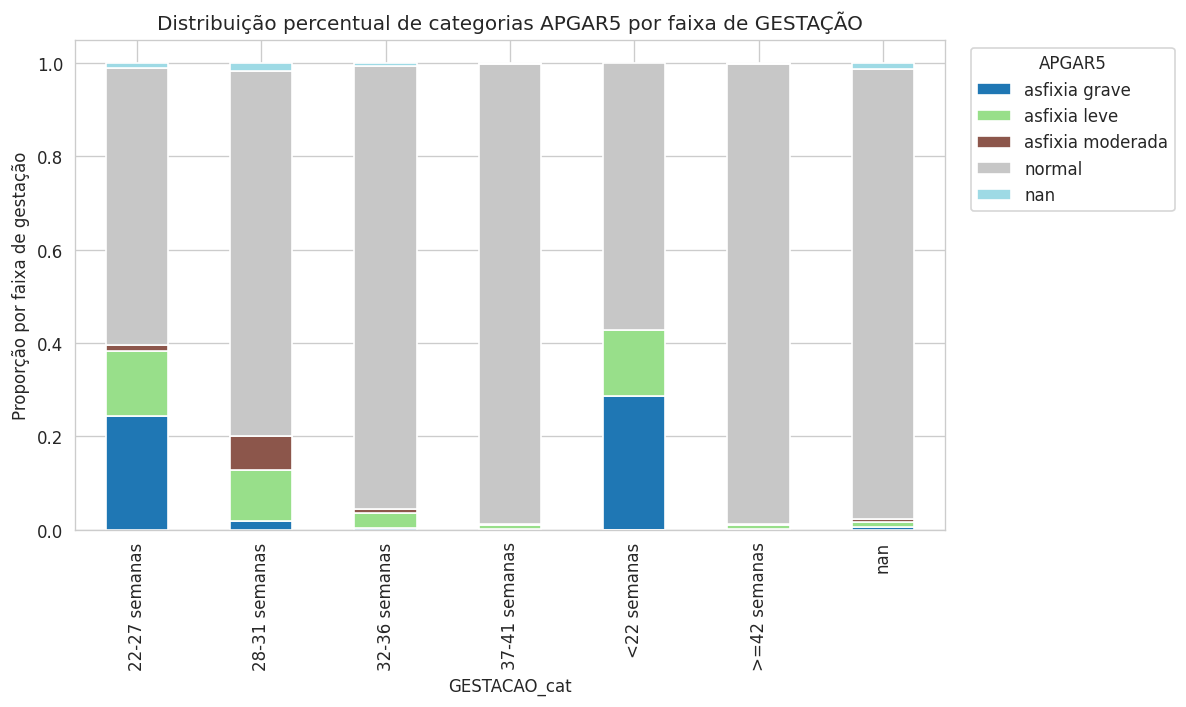


Interpretação orientadora:
- Se as categorias correspondentes a gestação <37 semanas (ex.: '<28', '28-31', '32-36' ou categorias codificadas equivalentes) apresentarem maior proporção de 'asfixia grave'/'asfixia moderada' do que as faixas a termo (37-41), isso corrobora a afirmação dos médicos de que prematuros têm maior risco de comprometimento ao nascer.
- Veja os percentuais da tabela acima para comparar: faixas pré-termo vs termo.


In [ ]:
# Plot de percentuais empilhados por GESTACAO_cat
crosstab_pct_line.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.ylabel('Proporção por faixa de gestação')
plt.title('Distribuição percentual de categorias APGAR5 por faixa de GESTAÇÃO')
plt.legend(title='APGAR5', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

# Conclusão orientadora:
print("\nInterpretação orientadora:")
print("- Se as categorias correspondentes a gestação <37 semanas (ex.: '<28', '28-31', '32-36' ou categorias codificadas equivalentes) apresentarem maior proporção de 'asfixia grave'/'asfixia moderada' do que as faixas a termo (37-41), isso corrobora a afirmação dos médicos de que prematuros têm maior risco de comprometimento ao nascer.")
print("- Veja os percentuais da tabela acima para comparar: faixas pré-termo vs termo.")

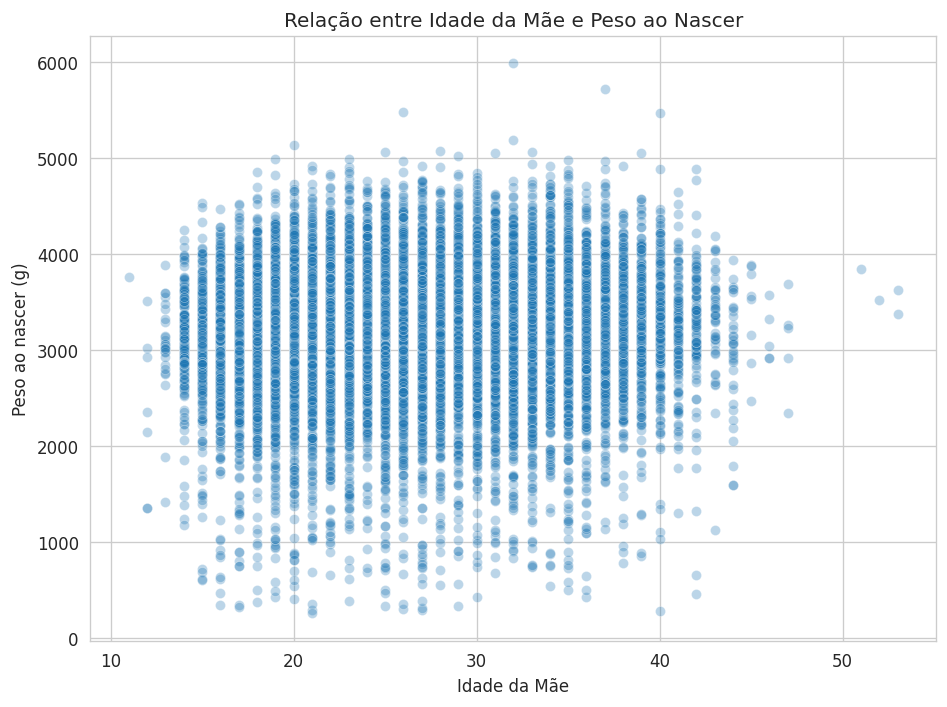

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sinasc, x='IDADEMAE', y='PESO_num', alpha=0.3)
plt.xlabel('Idade da Mãe')
plt.ylabel('Peso ao nascer (g)')
plt.title('Relação entre Idade da Mãe e Peso ao Nascer')
plt.tight_layout()
plt.show()

**7 - Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.**

In [ ]:
# Garantir coluna peso numérica
sinasc['PESO_num'] = pd.to_numeric(sinasc['PESO'], errors='coerce')

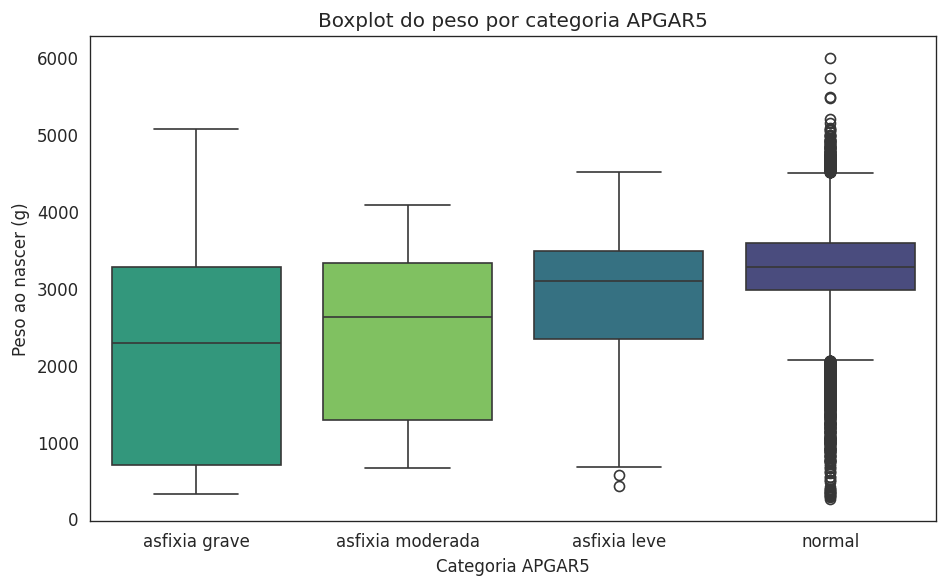

In [ ]:
# (A) Boxplot do PESO por categoria de APGAR5
plt.figure(figsize=(8,5))
sns.boxplot(data=sinasc, x='APGAR5_cat', y='PESO_num', order=['asfixia grave','asfixia moderada','asfixia leve','normal'], palette='viridis', hue='APGAR5_cat', legend=False)
plt.xlabel('Categoria APGAR5')
plt.ylabel('Peso ao nascer (g)')
plt.title('Boxplot do peso por categoria APGAR5')
plt.tight_layout()
plt.show()

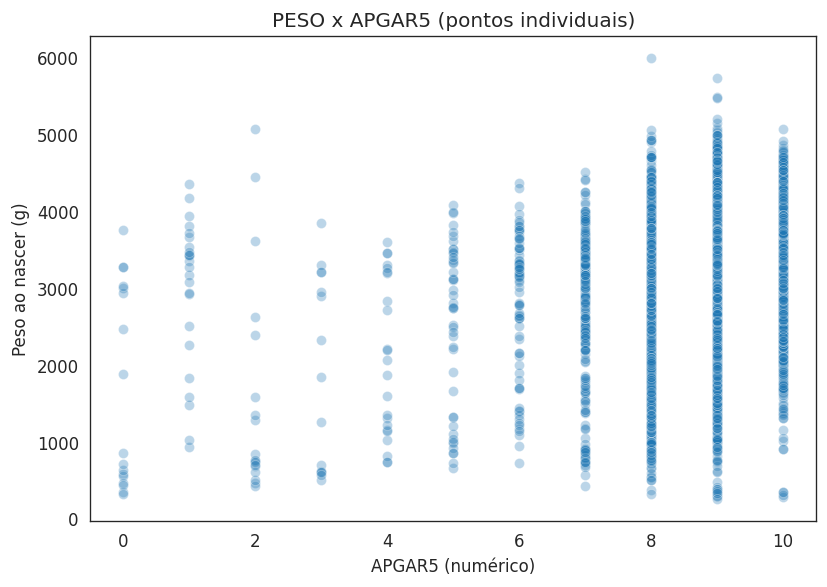

In [ ]:
# Scatterplot PESO x APGAR5_num (sem jitter excessivo)
plt.figure(figsize=(7,5))
sns.scatterplot(data=sinasc, x='APGAR5_num', y='PESO_num', alpha=0.3)
plt.xlabel('APGAR5 (numérico)')
plt.ylabel('Peso ao nascer (g)')
plt.title('PESO x APGAR5 (pontos individuais)')
plt.tight_layout()
plt.show()

In [ ]:
# (C) Média e intervalo (std/CI) do PESO por APGAR5_cat
peso_mean = sinasc.groupby('APGAR5_cat')['PESO_num'].agg(['count','mean','std']).reindex(['asfixia grave','asfixia moderada','asfixia leve','normal'])
print("\nEstatísticas do PESO por categoria APGAR5:")
display(peso_mean)


Estatísticas do PESO por categoria APGAR5:


,count,mean,std
APGAR5_cat,,,
asfixia grave,74,2119.500000,1344.619417
asfixia moderada,68,2377.617647,1064.169104
asfixia leve,320,2809.909375,922.801076
normal,26463,3255.144012,524.068542


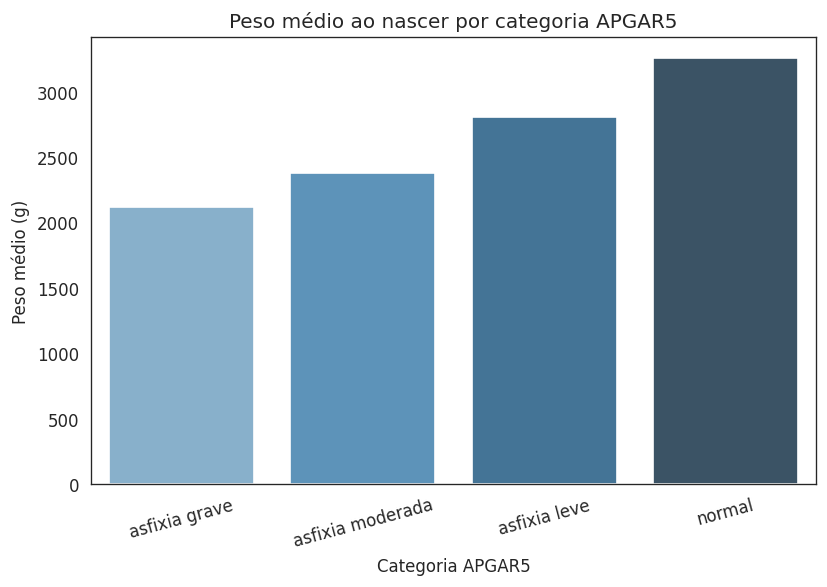

In [92]:
plt.figure(figsize=(7,5))
sns.barplot(x=peso_mean.index, y=peso_mean['mean'], order=peso_mean.index, palette='Blues_d', hue=peso_mean.index, legend=False)
plt.ylabel('Peso médio (g)')
plt.xlabel('Categoria APGAR5')
plt.title('Peso médio ao nascer por categoria APGAR5')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

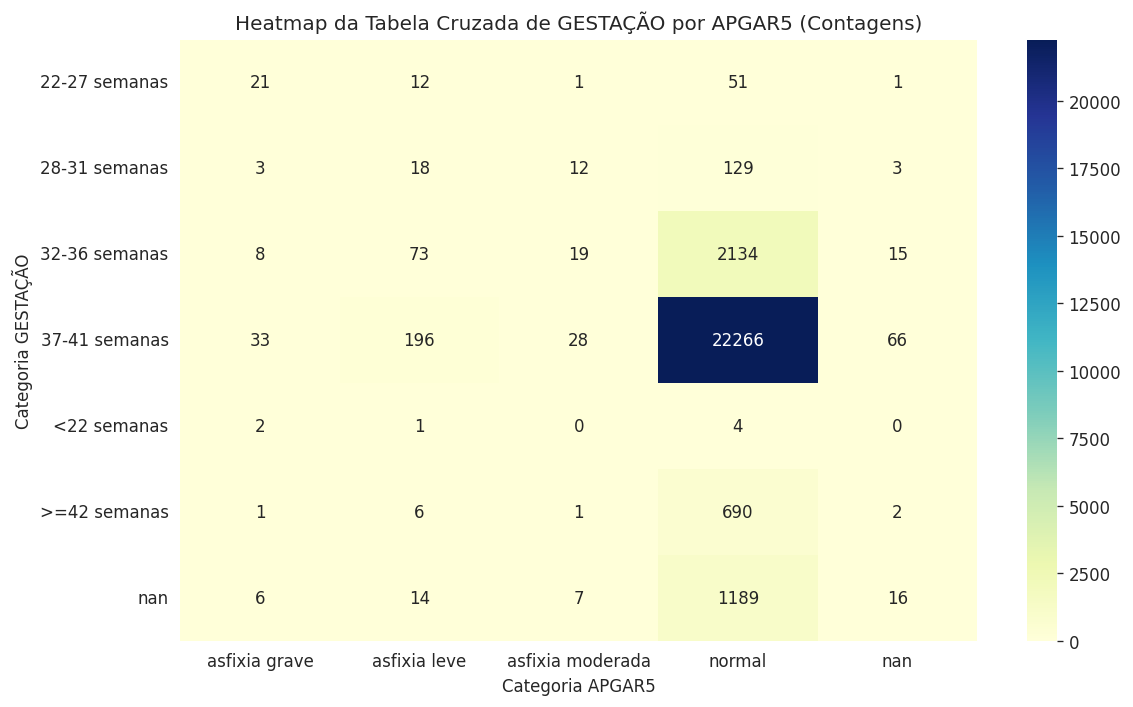

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Categoria APGAR5')
plt.ylabel('Categoria GESTAÇÃO')
plt.title('Heatmap da Tabela Cruzada de GESTAÇÃO por APGAR5 (Contagens)')
plt.tight_layout()
plt.show()

In [ ]:
# Estatística rápida de correlação entre APGAR5_num e PESO_num
corr = sinasc[['APGAR5_num','PESO_num']].dropna().corr().iloc[0,1]
print(f"\nCorrelação (Pearson) entre APGAR5_num e PESO_num: {corr:.3f}")


Correlação (Pearson) entre APGAR5_num e PESO_num: 0.168


In [ ]:
# Usar a coluna 'GESTACAO_cat'
crosstab = pd.crosstab(sinasc['GESTACAO_cat'], sinasc['APGAR5_cat'], dropna=False)
print("\nTabela cruzada (contagens):")
display(crosstab)


Tabela cruzada (contagens):


APGAR5_cat,asfixia grave,asfixia leve,asfixia moderada,normal,NaN
GESTACAO_cat,,,,,
22-27 semanas,21,12,1,51,1
28-31 semanas,3,18,12,129,3
32-36 semanas,8,73,19,2134,15
37-41 semanas,33,196,28,22266,66
<22 semanas,2,1,0,4,0
>=42 semanas,1,6,1,690,2
NaN,6,14,7,1189,16


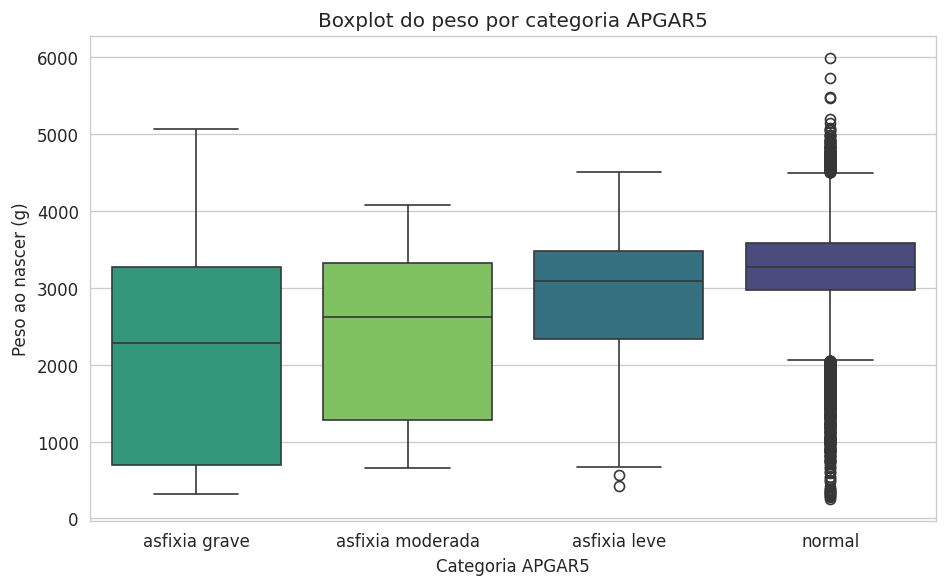

In [ ]:
# (A) Boxplot do PESO por categoria de APGAR5
plt.figure(figsize=(8,5))
sns.boxplot(data=sinasc, x='APGAR5_cat', y='PESO_num', order=['asfixia grave','asfixia moderada','asfixia leve','normal'], palette='viridis', hue='APGAR5_cat', legend=False)
plt.xlabel('Categoria APGAR5')
plt.ylabel('Peso ao nascer (g)')
plt.title('Boxplot do peso por categoria APGAR5')
plt.tight_layout()
plt.show()

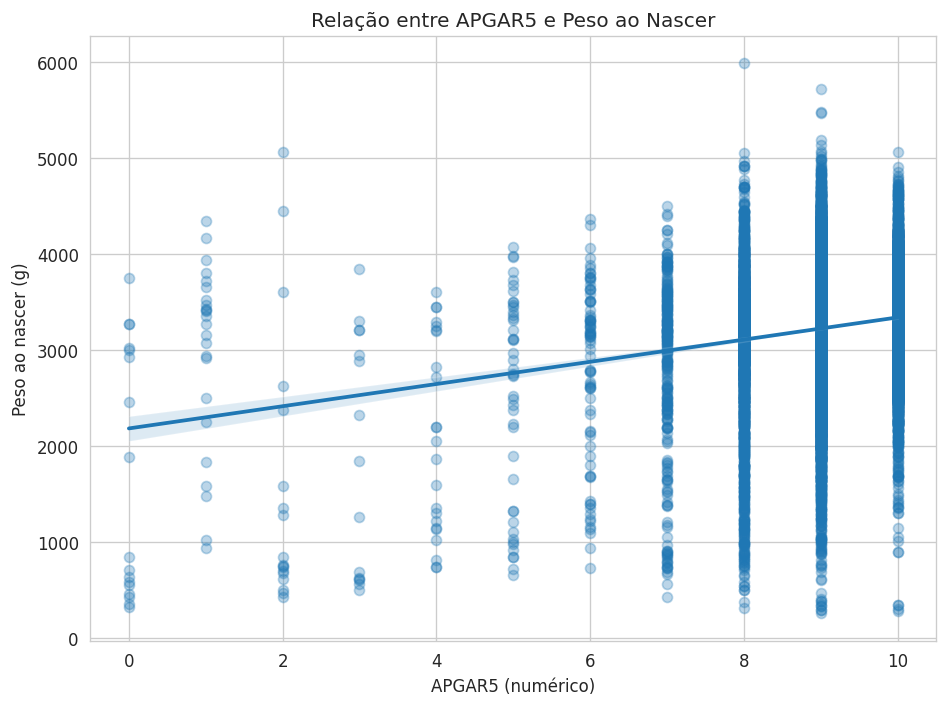

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=sinasc, x='APGAR5_num', y='PESO_num', scatter_kws={'alpha':0.3})
plt.xlabel('APGAR5 (numérico)')
plt.ylabel('Peso ao nascer (g)')
plt.title('Relação entre APGAR5 e Peso ao Nascer')
plt.tight_layout()
plt.show()

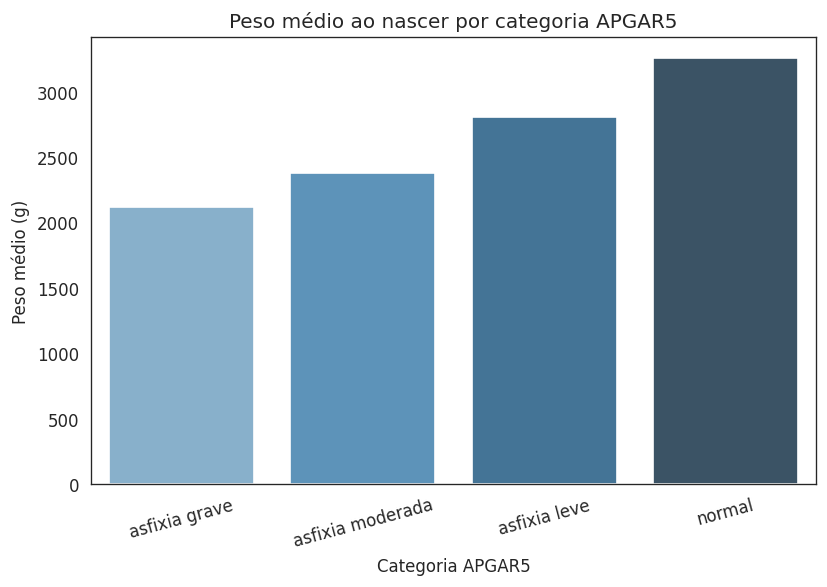

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=peso_mean.index, y=peso_mean['mean'], order=peso_mean.index, palette='Blues_d', hue=peso_mean.index, legend=False)
plt.ylabel('Peso médio (g)')
plt.xlabel('Categoria APGAR5')
plt.title('Peso médio ao nascer por categoria APGAR5')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

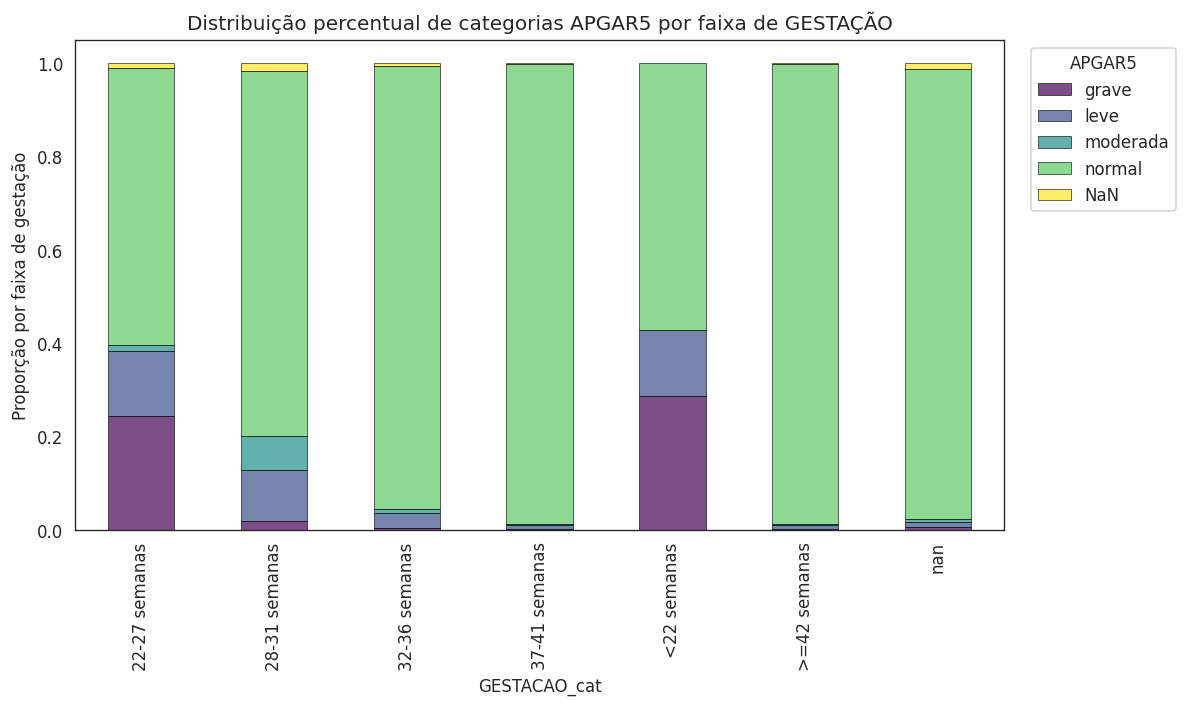

In [ ]:
# Plot de percentuais empilhados por GESTACAO_cat
# Usando rótulos abreviados para a legenda
# Order of columns in crosstab_pct_line: asfixia grave, asfixia leve, asfixia moderada, normal, NaN
# Reconfirming column order from crosstab_pct_line.columns
plot_columns = crosstab_pct_line.columns.tolist()
abbreviated_labels = ['grave', 'leve', 'moderada', 'normal', 'NaN'] # Ensure this order matches plot_columns


crosstab_pct_line[plot_columns].plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.ylabel('Proporção por faixa de gestação')
plt.title('Distribuição percentual de categorias APGAR5 por faixa de GESTAÇÃO')
plt.legend(title='APGAR5', bbox_to_anchor=(1.02,1), loc='upper left', labels=abbreviated_labels)
plt.tight_layout()
plt.show()

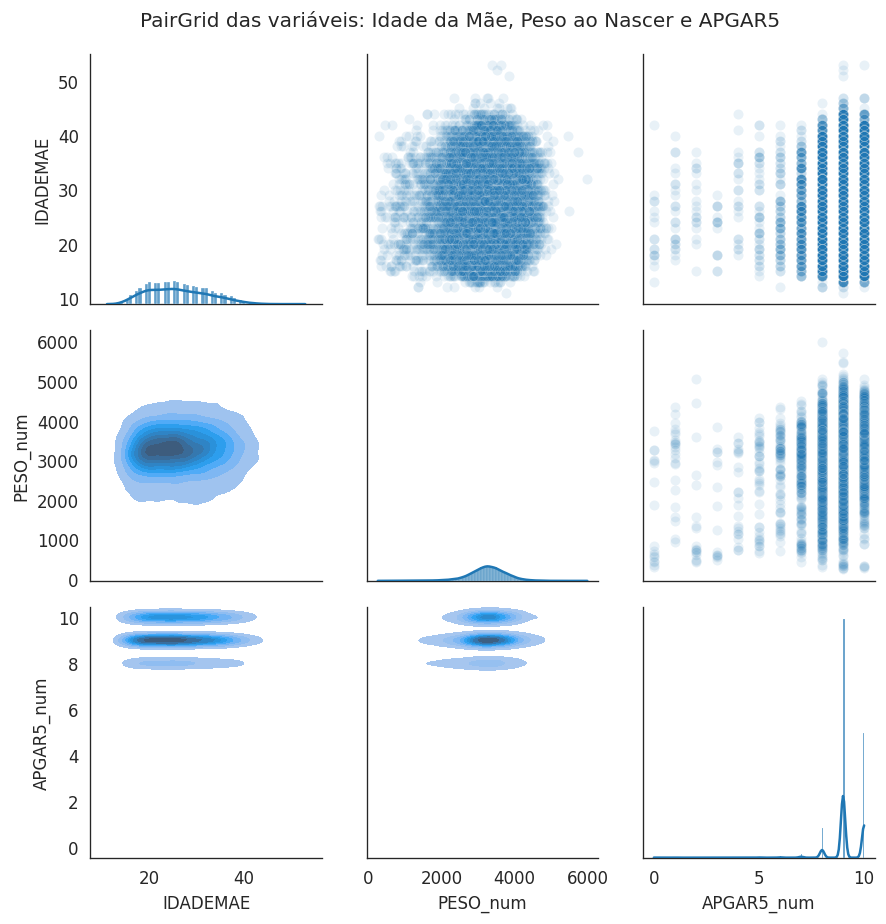

In [ ]:
# Criar um PairGrid com as colunas especificadas
# Remover linhas com valores ausentes nas colunas de interesse para o pairgrid
df_pairgrid = sinasc[['IDADEMAE', 'PESO_num', 'APGAR5_num']].dropna()

g = sns.PairGrid(df_pairgrid)
g.map_upper(sns.scatterplot, alpha=0.1) # Reduzindo alpha para maior transparência
g.map_lower(sns.kdeplot, fill=True) # Adicionar fill=True para preencher a área do KDE
g.map_diag(sns.histplot, kde=True, alpha=0.7) # Adicionar alpha para transparência no histograma
plt.suptitle('PairGrid das variáveis: Idade da Mãe, Peso ao Nascer e APGAR5', y=1.02) # Adicionar título
plt.show()

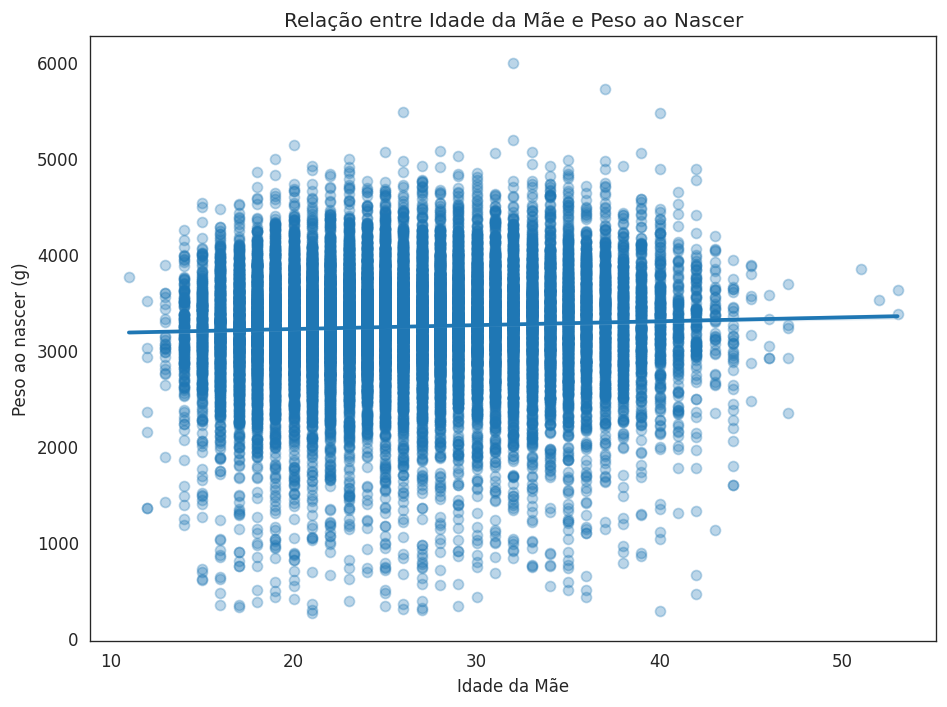

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=sinasc, x='IDADEMAE', y='PESO_num', scatter_kws={'alpha':0.3})
plt.xlabel('Idade da Mãe')
plt.ylabel('Peso ao nascer (g)')
plt.title('Relação entre Idade da Mãe e Peso ao Nascer')
plt.tight_layout()
plt.show()

In [ ]:
# Calcular o coeficiente de correlação entre PESO_num e IDADEMAE
correlation = sinasc['PESO_num'].corr(sinasc['IDADEMAE'])
print(f"Coeficiente de correlação entre Peso ao Nascer e Idade da Mãe: {correlation:.3f}")

Coeficiente de correlação entre Peso ao Nascer e Idade da Mãe: 0.047


In [ ]:
print("Resumo da coluna IDADEMAE:")
display(sinasc['IDADEMAE'].describe())

Resumo da coluna IDADEMAE:


,IDADEMAE
count,27028.000000
mean,26.093718
std,6.387094
min,11.000000
25%,21.000000
50%,26.000000
75%,31.000000
max,53.000000


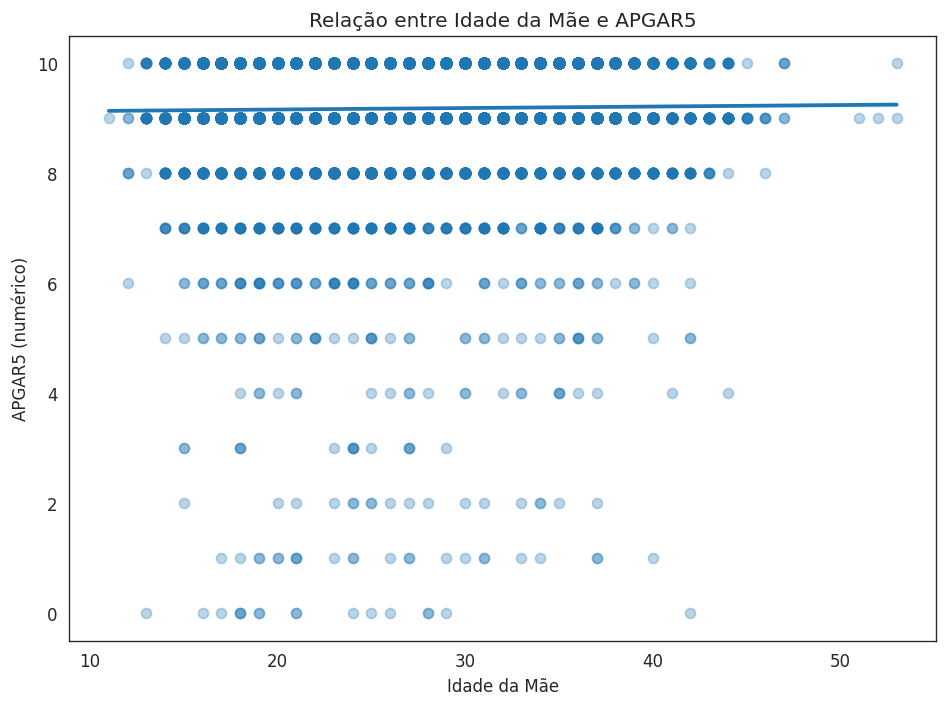

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=sinasc, x='IDADEMAE', y='APGAR5_num', scatter_kws={'alpha':0.3})
plt.xlabel('Idade da Mãe')
plt.ylabel('APGAR5 (numérico)')
plt.title('Relação entre Idade da Mãe e APGAR5')
plt.tight_layout()
plt.show()

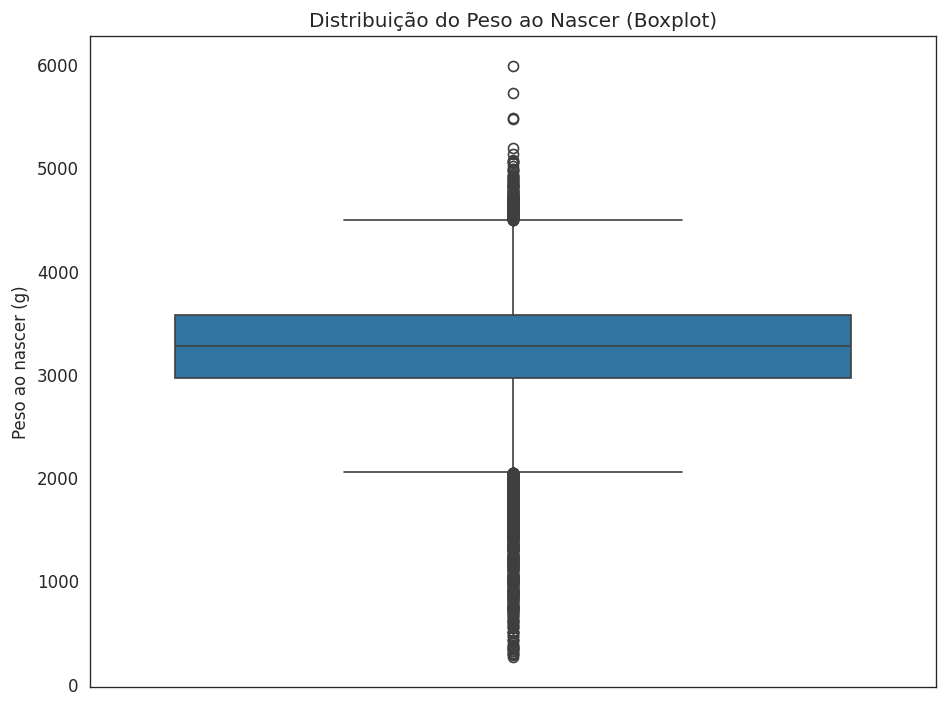

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=sinasc, y='PESO_num')
plt.ylabel('Peso ao nascer (g)')
plt.title('Distribuição do Peso ao Nascer (Boxplot)')
plt.tight_layout()
plt.show()

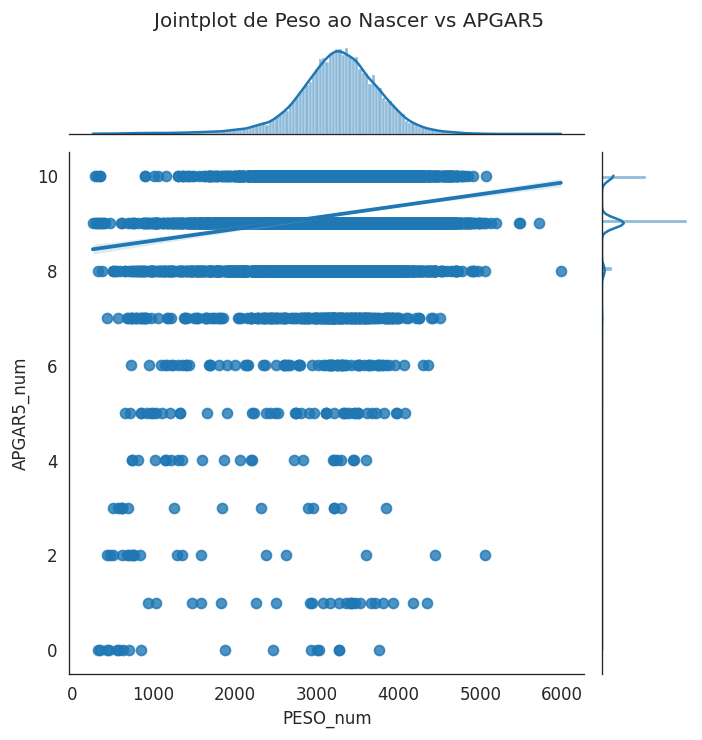

In [ ]:
sns.jointplot(data=sinasc.dropna(subset=['PESO_num', 'APGAR5_num']), x='PESO_num', y='APGAR5_num', kind='reg')
plt.suptitle('Jointplot de Peso ao Nascer vs APGAR5', y=1.02)
plt.show()

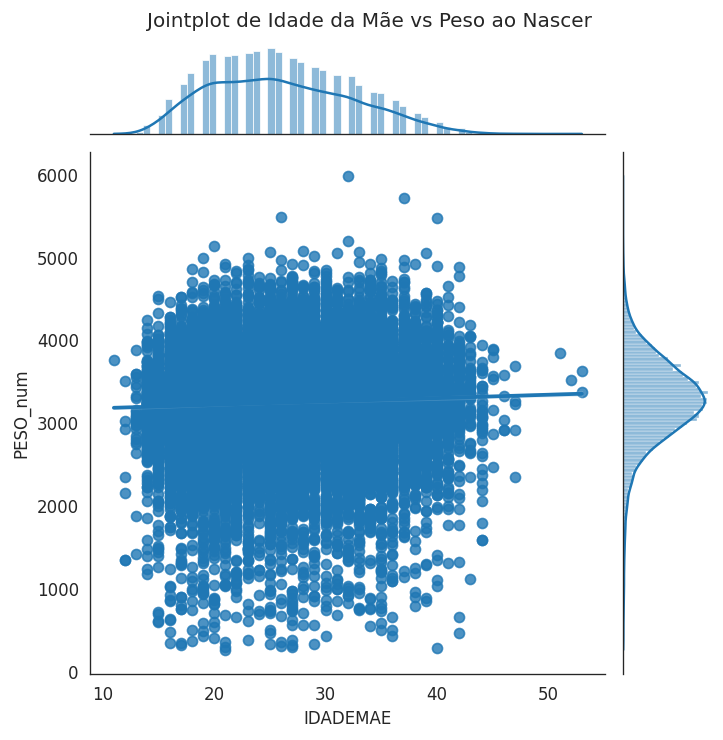

In [ ]:
sns.jointplot(data=sinasc.dropna(subset=['IDADEMAE', 'PESO_num']), x='IDADEMAE', y='PESO_num', kind='reg') # 'reg' adds regression line and KDE
plt.suptitle('Jointplot de Idade da Mãe vs Peso ao Nascer', y=1.02)
plt.show()

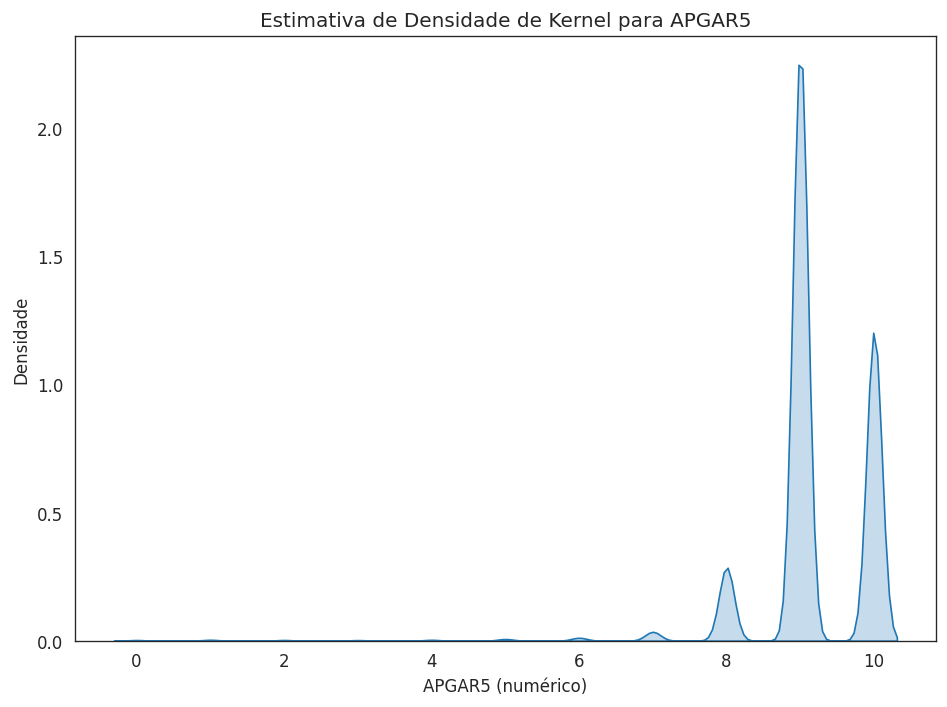

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=sinasc, x='APGAR5_num', fill=True)
plt.xlabel('APGAR5 (numérico)')
plt.ylabel('Densidade')
plt.title('Estimativa de Densidade de Kernel para APGAR5')
plt.tight_layout()
plt.show()

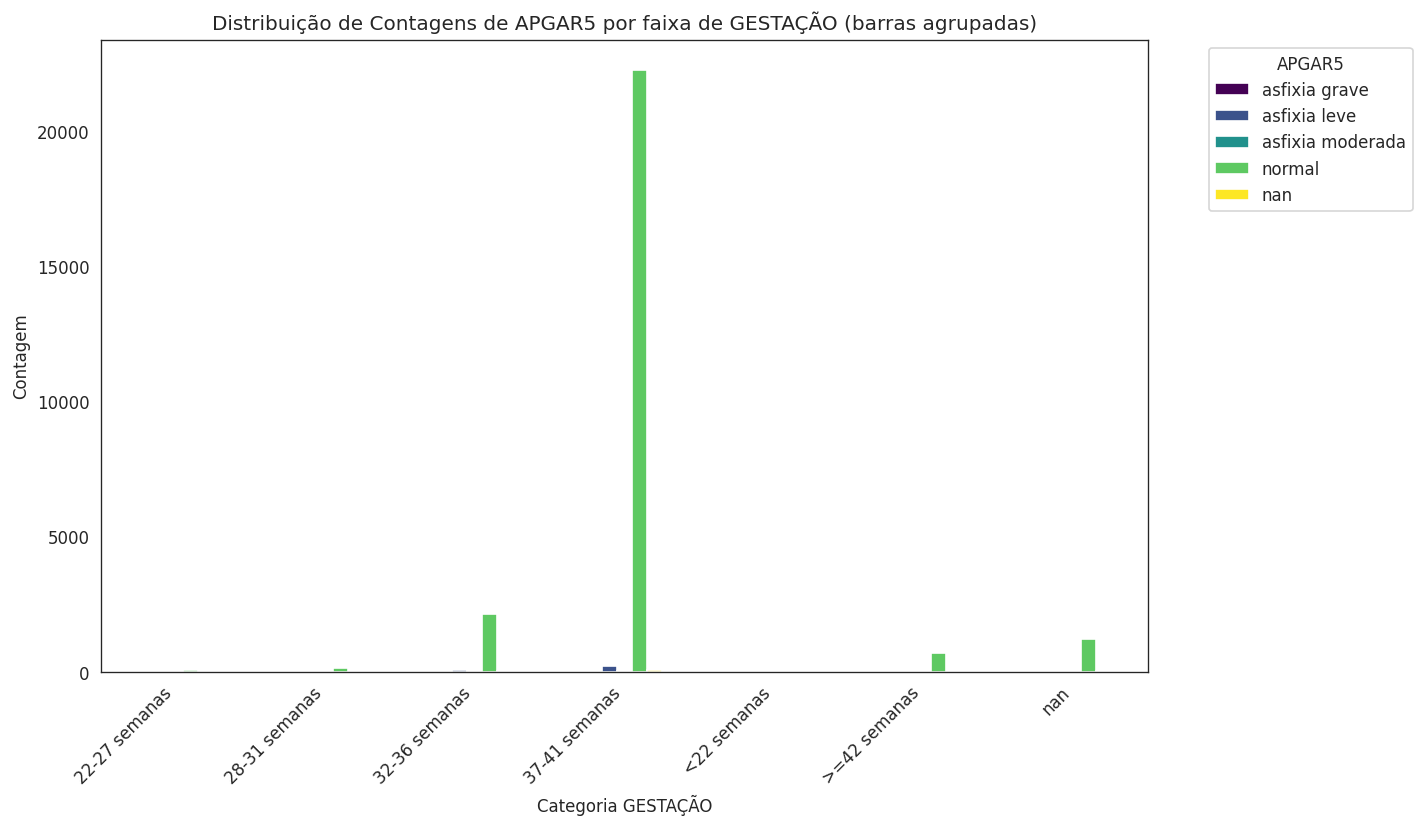

In [ ]:
# Gráfico de barras agrupadas da tabela de contagens
crosstab.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.ylabel('Contagem')
plt.xlabel('Categoria GESTAÇÃO')
plt.title('Distribuição de Contagens de APGAR5 por faixa de GESTAÇÃO (barras agrupadas)')
plt.legend(title='APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left') # Ajustando bbox_to_anchor
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
crosstab_pct_line = crosstab.div(crosstab.sum(axis=1), axis=0).fillna(0)
print("\nTabela cruzada (percentuais por linha):")
display((crosstab_pct_line * 100).round(2))  # mostrar em % com 2 casas


Tabela cruzada (percentuais por linha):


APGAR5_cat,asfixia grave,asfixia leve,asfixia moderada,normal,NaN
GESTACAO_cat,,,,,
22-27 semanas,24.42,13.95,1.16,59.30,1.16
28-31 semanas,1.82,10.91,7.27,78.18,1.82
32-36 semanas,0.36,3.25,0.84,94.89,0.67
37-41 semanas,0.15,0.87,0.12,98.57,0.29
<22 semanas,28.57,14.29,0.00,57.14,0.00
>=42 semanas,0.14,0.86,0.14,98.57,0.29
NaN,0.49,1.14,0.57,96.51,1.30


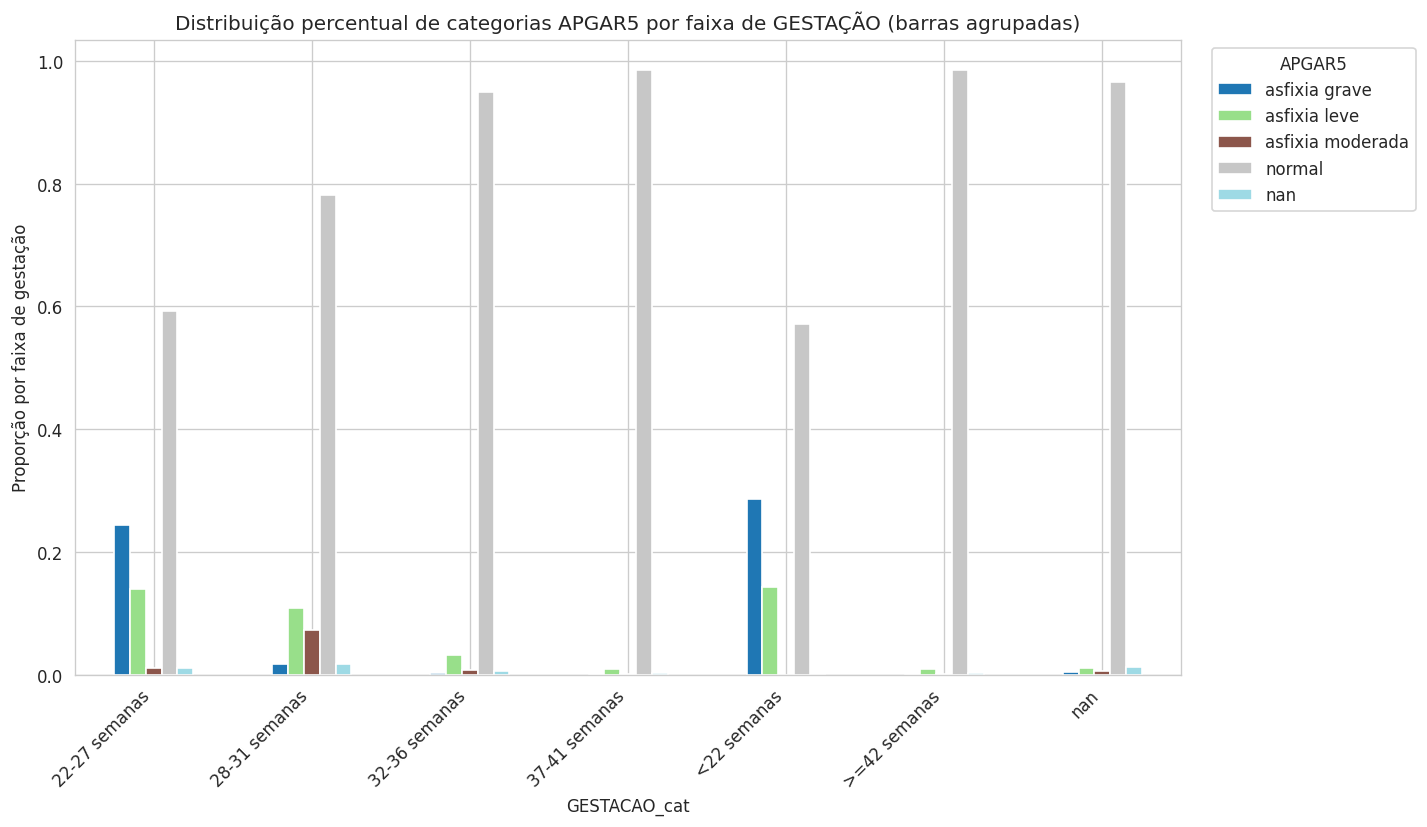

In [ ]:
# Gráfico de barras agrupadas de percentuais por GESTACAO_cat e APGAR5_cat
crosstab_pct_line.plot(kind='bar', figsize=(12, 7), colormap='tab20')
plt.ylabel('Proporção por faixa de gestação')
plt.title('Distribuição percentual de categorias APGAR5 por faixa de GESTAÇÃO (barras agrupadas)')
plt.legend(title='APGAR5', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()